In [4]:
import random
import sys
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

INT_MAX = sys.maxsize  
INT_MIN = -sys.maxsize-1


# https://stackoverflow.com/questions/45888346/python-numpy-generated-binary-file-to-be-read-by-c
# | numpy    | C
# +----------+---------------
# | np.int32 | int32_t / char
# | np.int64 | int64_t
# | np.intc  | int
  
def generate(n, unique=False):
  if unique:
    # Generate a uniform random sample from np.arange(n*2) of size 'n' without replacement
    return np.random.choice(n*2, size=n, replace=False) ## .dtype == int64

  # Return random integers from INT_MIN (inclusive) to INT_MAX+1 (exclusive)
  return np.random.randint(low=INT_MIN, high=INT_MAX+1, size=n, dtype=np.int64)
#   return np.random.uniform(INT_MIN, INT_MAX, size)

def save_arr(arr, filename):
  return arr.tofile(filename, sep=" ", format="%i")
#   fd = open(filename, mode='wb')
#   arr.tofile(fd)
#   fd.close


In [129]:
# Return a k length list of unique elements chosen from the population sequence.
# Used for random sampling without replacement
random.sample(range(INT_MAX), 3)

[3322922682349032010, 1745553721674944218, 5558999733606614238]

In [31]:
generate(100, False).dtype

dtype('int64')

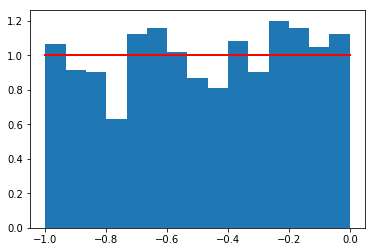

In [3]:
s = np.random.uniform(-1,0,1000)
count, bins, ignored = plt.hist(s, 15, density=True)
plt.plot(bins, np.ones_like(bins), linewidth=2, color='r')
plt.show()

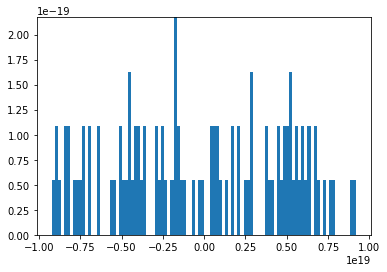

In [146]:
#s = np.random.randint(low=INT_MIN, high=INT_MAX, size=1000)
N=100
s=generate(N, False)
count, bins, ignored = plt.hist(s, N, density=True)
plt.show()

In [23]:
#np.random.randint(5, size=(2, 4))
x = np.random.randint(5, size=10)
save_arr(x, 'nums.txt')
# sys.getsizeof(x)
print("%d bytes" % (x.size * x.itemsize))

80 bytes


# Aqui

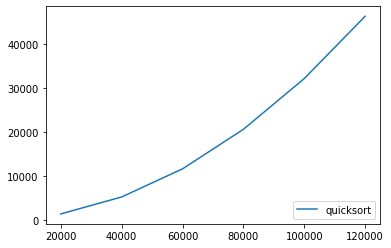

In [32]:
fig = plt.figure()

x = quick['instancia']
y = quick['tempo(ms)']

plt.plot(x, y, label='quicksort')

plt.legend(loc='lower right')
#fig.savefig('graph.png')

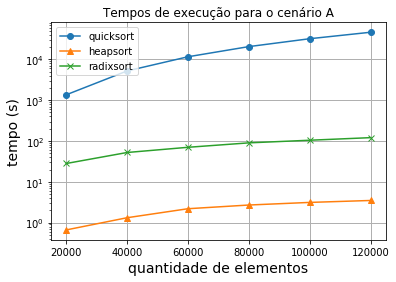

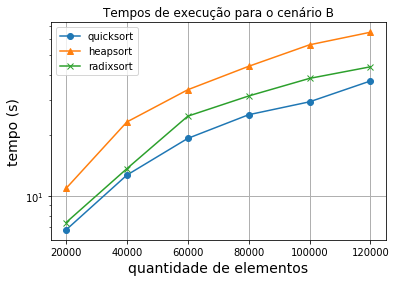

In [9]:
import pandas as pd
def plot_dataframe(source_df, filename_img, cenario_id):
    fig = plt.figure()

    algoritmos = ['quicksort', 'heapsort', 'radixsort']
    marcas = ['o', '^', 'x']
    for (idx, algoritmo) in enumerate(algoritmos):
        df = source_df[source_df['#algoritmo'] == algoritmo]
        plt.plot(df['instancia'], df['tempo(ms)'],
                marker=marcas[idx], label=algoritmo)

    # heap = Adf[Adf['#algoritmo'] == 'heapsort']
    # plt.plot(heap['instancia'], heap['tempo(ms)']/1000, label='heapsort')
    plt.xlabel('quantidade de elementos', fontsize=12)
    plt.ylabel('tempo (ms)', fontsize=12)

    plt.title('Tempos de execução para o cenário ' + cenario_id, fontsize=14)

    plt.grid(linestyle='-', linewidth=1)
    plt.legend()
    plt.yscale('log')

    plt.show()
    fig.savefig(filename_img + '.png', dpi=100)

dados = [
    ('_resultados_/A.tempos.csv', 'A'),
    ('_resultados_/B.tempos.csv', 'B')
]

for (dado, cid) in dados:
    plot_dataframe(pd.read_csv(dado), dado, cid)

## A

In [15]:
dados_A = pd.read_csv('_resultados_/A.tempos.csv')
dados_B = pd.read_csv('_resultados_/B.tempos.csv')

def get_dados_algoritmo(entrada, algoritmo):
    return entrada[ entrada['#algoritmo'] == algoritmo ]

In [16]:
get_dados_algoritmo(dados_A, 'quicksort')

,#algoritmo,instancia,tempo(ms)
0,quicksort,20000,1358.33
3,quicksort,40000,5215.60
6,quicksort,60000,11606.90
9,quicksort,80000,20591.30
12,quicksort,100000,32139.20
15,quicksort,120000,46304.30


In [17]:
get_dados_algoritmo(dados_A, 'radixsort')

,#algoritmo,instancia,tempo(ms)
2,radixsort,20000,28.106
5,radixsort,40000,52.292
8,radixsort,60000,70.120
11,radixsort,80000,90.080
14,radixsort,100000,104.466
17,radixsort,120000,120.878


In [18]:
get_dados_algoritmo(dados_A, 'heapsort')

,#algoritmo,instancia,tempo(ms)
1,heapsort,20000,0.662
4,heapsort,40000,1.318
7,heapsort,60000,2.190
10,heapsort,80000,2.698
13,heapsort,100000,3.126
16,heapsort,120000,3.488


## B

In [19]:
get_dados_algoritmo(dados_B, 'quicksort')

,#algoritmo,instancia,tempo(ms)
0,quicksort,20000,6.798
3,quicksort,40000,12.722
6,quicksort,60000,19.344
9,quicksort,80000,25.344
12,quicksort,100000,29.372
15,quicksort,120000,37.266


In [20]:
get_dados_algoritmo(dados_B, 'heapsort')

,#algoritmo,instancia,tempo(ms)
1,heapsort,20000,10.922
4,heapsort,40000,23.340
7,heapsort,60000,33.720
10,heapsort,80000,44.066
13,heapsort,100000,56.334
16,heapsort,120000,65.032


In [22]:
get_dados_algoritmo(dados_B, 'radixsort')

,#algoritmo,instancia,tempo(ms)
2,radixsort,20000,7.392
5,radixsort,40000,13.692
8,radixsort,60000,24.932
11,radixsort,80000,31.398
14,radixsort,100000,38.386
17,radixsort,120000,43.818
